In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from utils.utils import generate_synthetic_data, generate_final_features, split_dataset
import warnings 
warnings.filterwarnings("ignore")

In [2]:
irregular_cycle_data = pd.read_csv('dataset\irregular_cycle_data.csv')
features_irregular_cycle_data, labels_irregular_cycle_data = generate_final_features(irregular_cycle_data)
input_train_irregular_cycle, input_test_irregular_cycle, output_train_irregular_cycle, output_test_irregular_cycle = split_dataset(features_irregular_cycle_data, labels_irregular_cycle_data, reshape=False)


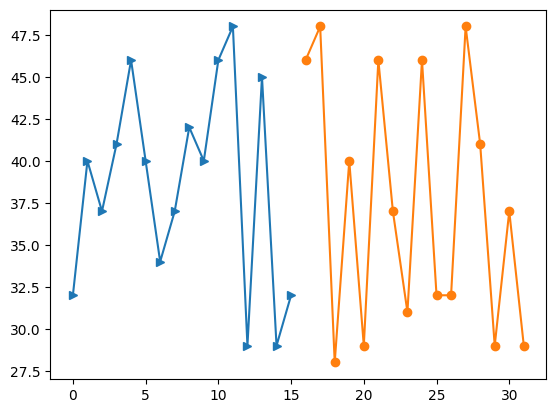

In [3]:
plt.plot(np.arange(16),input_train_irregular_cycle[:,0,0], '->')
plt.plot(np.arange(16, 2*16),output_train_irregular_cycle[:,0], '-o')

In [37]:
# create and fit the LSTM network
n_features = input_train_irregular_cycle.shape[2]
model = Sequential()
model.add(LSTM(64, input_shape=(3, n_features),  activation='tanh'))
model.add(Dropout(0.05))
model.add(Dense(n_features, activation='relu'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_11 (LSTM)              (None, 64)                17152     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 2)                 130       
                                                                 
Total params: 17,282
Trainable params: 17,282
Non-trainable params: 0
_________________________________________________________________


In [38]:
opt=tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt)
# add early stopping
early_stopping = tf.keras.callbacks.EarlyStopping( monitor='val_loss', patience=10, restore_best_weights=True)

In [39]:
history = model.fit(input_train_irregular_cycle, output_train_irregular_cycle, epochs=200, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping])

Epoch 1/200
1/1 [==============================] - 9s 9s/step - loss: 748.0392 - val_loss: 543.1077
Epoch 2/200
1/1 [==============================] - 0s 116ms/step - loss: 721.4025 - val_loss: 519.6349
Epoch 3/200
1/1 [==============================] - 0s 112ms/step - loss: 693.6570 - val_loss: 495.4280
Epoch 4/200
1/1 [==============================] - 0s 111ms/step - loss: 661.2407 - val_loss: 471.1059
Epoch 5/200
1/1 [==============================] - 0s 122ms/step - loss: 633.0700 - val_loss: 446.9922
Epoch 6/200
1/1 [==============================] - 0s 133ms/step - loss: 606.6891 - val_loss: 423.0901
Epoch 7/200
1/1 [==============================] - 0s 130ms/step - loss: 577.7502 - val_loss: 398.9463
Epoch 8/200
1/1 [==============================] - 0s 110ms/step - loss: 552.2532 - val_loss: 374.6135
Epoch 9/200
1/1 [==============================] - 0s 113ms/step - loss: 520.6901 - val_loss: 351.1210
Epoch 10/200
1/1 [==============================] - 0s 168ms/step - loss: 49